#"Big Data And Society: Lab 4" 
##Networks and Data Aggregation

![IPython](images/151110_Congestion.jpg "Riyadh Road Congestion")


### 0. Networks Overview
Real-world data can be represented through graphs. At the same time, analytical models have been developed to simulate and compare models with real-world networks, allowing us to abstract, simulate and identify specific conditions of the network in a controlled model. The understanding of the components and properties of the representation provides a useful roadmap for their use in developing their appropriate spatial representation.

In mathematics, **graphs** are used to represent **networks**. A graph represents entities that can be connected with each other through pair-like links or **edges**. The objects represented in a graph are called **nodes**, and they represent the fundamental unit of graphs . **Nodes** can have a number of properties and are indivisible. The relationships between the nodes of a graph are specified by **edges**, or connections among nodes. In more complex graph representations, edges or relationships can be **directed** or **undirected**, where the relationship is symmetric or asymmetric. Similarly edges can be **weighted** according to discrete relationships.

![IPython](images/Graph_theory_tree.jpg)

Here, the nodes are represented by numbered circles, and the edges are the undirected lines connecting them.



### Network Properties
The organization of a network can be described based on its topology, or arrangement of nodes and edges. At the same time, a number of network properties that analyze the topological conditions of the network can be described. 

The network **Degree** is the number of edges that are incident on a node. Nodes with a higher degree are more connected to other nodes, and can become network hubs. Network **Paths** are a sequence of nodes in which each node is adjacent to the next one. The shortest path between two nodes is defined as the number of edges along the shortest path connecting them. Finally, the **Clustering Coefficient** is a description of the connectedness of the neighbors of a node.

### Relationships Among Networks
When describing networks through graph relationships it is possible to construct models of isolated networks, or models that can represent relationships among different sets or spatial layers. 

**Mono-partite Networks** are the simplest network representation. All the nodes of mono-partite networks are part of the same set of information. **Road networks** can be an example of mono-partite networks, where each node is road starting point or intersection with other road. 

**Mutli-partite Networks** are networks whose nodes can be divided into multiple independent sets or sublayers of information. In this representation, nodes from different networks can be  related to each other, constructing heterogeneous relationships among its nodes. For example, if we represent a social network we could map both the relationships between users, and the social posts each user has, combining two distinct sets of nodes. 


### 1. NetworkX
[**NetworkX**](https://networkx.github.io/) is a Python library for representing graphs and networks. It contains `classes` for creating `graphs` and `digraphs`, and functions to calculate network properties such as `adjacency, degree, diameter, radius, center, betweenness`, etc. Additionally, it contains functionality for drawing **2D** and **3D** networks.

First we need to import the libraries, and some of their components. **NetworkX**, Networkx contains many algorithms for common network computations. NetworkX wraps the mathematical components of a graph into a `dictionary` like syntax, exposing **nodes** and **edges** as `dictionaries`. Dictionaries allow the inclusion of metadata along with the network topology within the network structure. To install **NetworkX** on a terminal or the command line, run the following command:
```
pip install networkx
```

We will also be using [**Seaborn**](http://stanford.edu/~mwaskom/software/seaborn/api.html). Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. It operates in a similar manner to **Matplotlib**, but creates more graphically appealing plots. 

To install seaborn, just run the following command:
```
pip install seaborn
```

In [2]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns


# This allows plots to appear on the IPython notebook.
%matplotlib inline 

The basic element of networkx is a network x [**Graph**](http://networkx.readthedocs.org/en/networkx-1.11/reference/classes.graph.html#networkx.Graph)

In [3]:
# Let's define an empty undirected graph.
G = nx.Graph()
# add nodes to the graph representing people
names = ['Sarah','Jinhua','Mariana','Eran','Alan',
         'Joe','Dennis', 'David', 'Eric', 'Carlo', 'James', 'Christopher']

last_names = ['Williams','Zhao','Arcaya','Ben-Joseph','Berger',
        'Ferreira','Frenchman', 'Hsu', 'Klopfer', 'Ratti', 'Wescoat', 'Zegras']
for i in range(len(names)):
    G.add_node(names[i], last_name=last_names[i])

# Accessing nodes and node data.
node = G.node['Sarah']
print "Sarah's Node: "+str(node)
print "Sarah's Lastname: "+node['last_name']

Sarah's Node: {'last_name': 'Williams'}
Sarah's Lastname: Williams


Adding edges among the nodes is very simple. It is also possible to create arbitrary properties on every node. We can even create a network using only edges, without even specifying the different nodes. 

In [4]:
# note that there is a lot of freedom in providing edge metadata.
# also, the relationships strengths are completely random.
G.add_edge('Sarah','Jinhua',relationshipStrength=2)
G.add_edge('Sarah','Mariana',relationshipStrength=10)
G.add_edge('Sarah','Eran',relationshipStrength=20)
G.add_edge('Sarah','Alan',relationshipStrength=5)
G.add_edge('Sarah','Joe', relationshipStrength=30)
G.add_edge('Sarah','Dennis',relationshipStrength=5)
G.add_edge('Sarah','David',relationShipStrength=10)
G.add_edge('Sarah','Eric',relationshipStrength=5)
G.add_edge('Sarah','Carlo', relationshipStrength=20)
G.add_edge('Sarah','James',relationshipStrength=5)

print "Sarah-Alan edge: "+str(G['Sarah']['Alan'])

G.add_edge('Carlo','Jinhua',relationshipStrength=2)
G.add_edge('Carlo','Mariana',relationshipStrength=10)
G.add_edge('Carlo','Eran',relationshipStrength=20)
G.add_edge('Carlo','Alan',relationshipStrength=5)
G.add_edge('Carlo','Joe', relationshipStrength=30)
G.add_edge('Carlo','Dennis',relationshipStrength=5)
G.add_edge('Carlo','David',relationShipStrength=10)
G.add_edge('Carlo','Eric',relationshipStrength=5)
G.add_edge('Carlo','Sarah', relationshipStrength=20)
G.add_edge('Carlo','James',relationshipStrength=5)
G.add_edge('Carlo','Christopher',relationshipStrength=5)

G.add_edge('Joe','Jinhua',relationshipStrength=2)
G.add_edge('Joe','Mariana',relationshipStrength=10)
G.add_edge('Joe','Eran',relationshipStrength=20)
G.add_edge('Joe','Dennis',relationshipStrength=5)
G.add_edge('Joe','David',relationShipStrength=10)
G.add_edge('Joe','Eric',relationshipStrength=5)
G.add_edge('Joe','Sarah', relationshipStrength=20)
G.add_edge('Joe','Carlo',relationshipStrength=5)
G.add_edge('Joe','Christopher',relationshipStrength=5)

Sarah-Alan edge: {'relationshipStrength': 5}


Networkx uses matplotlib's functions to create its plots. It has built a wrapper around matplotlib's api. However, we can still control some specifics of the plot, like the figure size, using matplotlib's functions. 

We will be working with networkx's [**draw API**](http://networkx.readthedocs.org/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw). When drawing networks, we can provide the position of the nodes ourselves, or we can use some of the [**built-in layouts**](http://networkx.readthedocs.org/en/networkx-1.11/reference/drawing.html#module-networkx.drawing.layout).

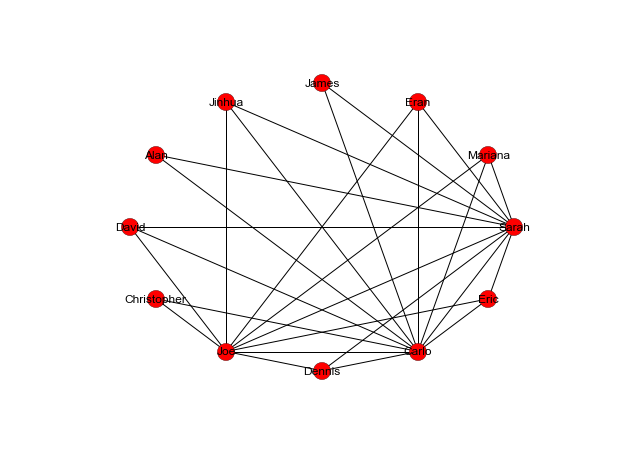

In [5]:
plt.figure(figsize=(8,6));
P = nx.circular_layout(G);
nx.draw(G,pos=P);
nx.draw_networkx_labels(G,pos=P); # semicolon suppresses output

Accessing different network properties is very simple. Additionaly, NetworkX implements a number of network analysis algorithms such as centrality. The **degree distribution** is a 'thumb-print' that allows us to understand the structure and dynamics of a networked system.

In [6]:
degrees = nx.degree(G)
print "All degrees: "+str(degrees)
print degrees['Alan']
print "degree of Mariana: "+str(G.degree('Mariana'))
D = degrees.values()

All degrees: {'Sarah': 10, 'Mariana': 3, 'Eran': 3, 'James': 2, 'Jinhua': 3, 'Alan': 2, 'David': 3, 'Christopher': 2, 'Joe': 9, 'Dennis': 3, 'Carlo': 11, 'Eric': 3}
2
degree of Mariana: 3


**NetworkX** has a number of plotting functions built-in. Apart from drawing nodes and edges, a number of the objects returned by the network functions are `numpy.arrays`, `dicts` or `lists` that can be easily passed to a **Matplotlib** function to represent them. While we are still using matplotlib to create the plots, we can use seaborn (sns) to improve the graphic style of the plots. By setting the [**style**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.set_style.html) of the plot, we have a choice to use some of seaborn's available style's. 

[10, 3, 3, 2, 3, 2, 3, 2, 9, 3, 11, 3]


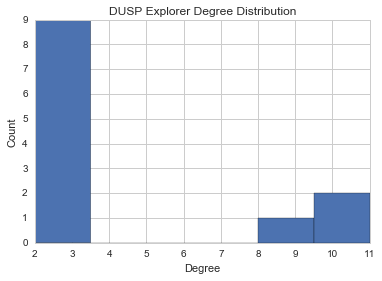

In [7]:
sns.set_style("whitegrid")
plt.figure()
print D
# We will be plotting the Degrees, that we stored in variable D
plt.hist(D,6)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('DUSP Explorer Degree Distribution')
# Answer:
# As n gets large, degree dist is a Poisson distribution.
plt.show()

### 2. Riyadh Road Network

For Riyadh, we have a number of **empirical** datasets that represent a number of network types. While **NetworkX** provides a number of functions to generate network models that may be used to approximate and study real-world networks, we will be utilizing and constructing empirical networks. Instead of procedurally creating the networks, or utilizing models, we will read in network data. Network data can have **many** different formats, different file types require different functions to be called, and can be parsed differently. Here, we will utilize a network stored as two separate files: the first file is a node file and contains metadata for the nodes' geographical location; the second file describes the edges by containing pairs of nodes, and contains a number of additional information describing the edge's properties.

In the given network, the **nodes** represent road intersections and the **edges** represent the actual roads. The dataset represents the routing results, and is based on the CDR data obtained during a month in Riyadh. 

First, we will read in the data. While **NetworkX** has a number of built-in functions to import data, and directly construct a network, our data doesn't follow their requirements. We will parse it through **pandas**, and then we will build the network procedurally. We can first import either the **nodes** or the **edges**. In our case, we don't really need the **nodes** to construct the network. 

#### But first, lets open `riyadh_route_edges_am.txt` with a text editor to look at its structure.

In [8]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
df.head()

,source,target,volume,capacity,voc,degree,free_travel_time,travel_time
eid,,,,,,,,
101,1,2,67.2220,2850,0.023587,158,0.268594,0.268594
20415,1,5748,53.1765,2850,0.018658,108,1.238560,1.238560
14254,1,9437,262.0150,2850,0.091935,406,1.354030,1.354040
11874,2,9950,8.0050,9405,0.000851,8,1.067390,1.067390
16603,2,1,209.0270,2850,0.073343,369,0.268594,0.268596


In [4]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)

# Let's define an empty undirected graph.
RG = nx.Graph()

# We also define the values for the edge attributes
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
i = 0
for row in df.itertuples(index=False):
    i +=1
    # If we use all the nodes, plotting the network takes a very long time!
    if i < 5000:
        values = row[2:]
        # We create a dictionary with the keys and row values
        edge_attributes = dict(zip(keys, values))
        my_tuple = (row[0], row[1])
        # We add the edge to the graph
        RG.add_edge(*my_tuple, attr_dict=edge_attributes)
degrees = nx.degree(RG)


We will be using the built-in plotting function. We can specify a number of visual properties and parameterize them according to network properties such as `degree`. However, since we haven't imported the X,Y location of the nodes, we cannot plot them in a spatially consistent manner. You can find out more about the functions on the [**API**](https://networkx.github.io/documentation/latest/reference/drawing.html)


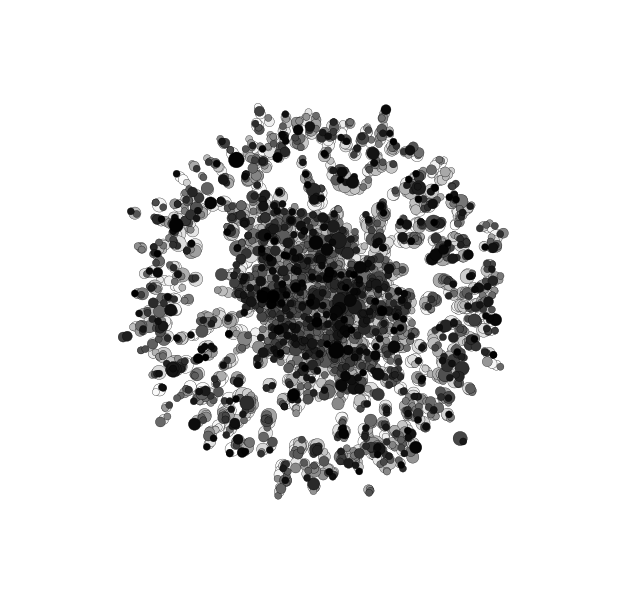

In [10]:
# Plotting might take a bit! We can stand up and stretch for a bit!

plt.figure(figsize=(8,8))
P = nx.spring_layout(RG)

#  Here we multiply the degree value times 50 to see the difference in size on our
plot.
node_sizes = [v * 50 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors);

Similarly, we can utilize some of the network properties and `Matplotlib` or `Seaborn` to create some exploratory visualizations. Again, while the plot is constructect with matplotlib, seaborn makes it more graphically appealing with a single line of code!

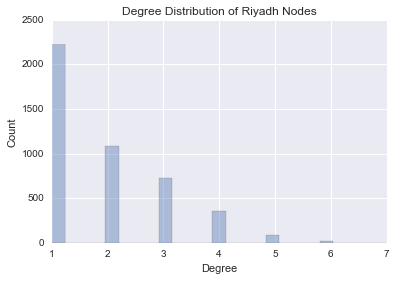

In [11]:
sns.set_style("darkgrid")
plt.figure()
sns.set_style("darkgrid")
sns.distplot(degrees.values(), kde=False)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Riyadh Nodes')

plt.show()

When a network is **connected**, we can compute additional properties such as **shortest paths**. The `shortest_path` function  computes the shortest paths in the graph, returning paths that include both the source and target in the path.

In [12]:
# If I pick any two intersections, is it possible to find a route 
# between them? Check if the network is connected.
print "Is the road network connected? "+str(nx.is_connected(RG))

# Here we generate all the shortest paths from the graph.
paths = nx.shortest_path(RG)

# Since all the paths are stored in a big dictionary, we can access the shortest path of every node by its index or name!
# We can start by printing all the paths from node 100
print "All paths from node-100: "+str(paths[100])

# And since within node 100, it connects to node 2093, we can count the number of nodes that exist between both
print "Length of path from node 1000 to node 2093 is "+str(len(paths[100][2093]))

Is the road network connected? False
All paths from node-100: {6656: [100, 194, 622, 627, 626, 2093, 2092, 5730, 1594, 1595, 6723, 1229, 1230, 593, 1129, 1130, 6448, 1900, 1899, 6656], 4113: [100, 194, 622, 627, 626, 2093, 2092, 5730, 1594, 1595, 6723, 1229, 1230, 593, 1129, 1130, 1798, 4113], 7187: [100, 194, 622, 627, 626, 2093, 2092, 5730, 1594, 1595, 6723, 1229, 1230, 593, 1129, 1130, 1798, 4113, 366, 7187], 539: [100, 194, 622, 627, 626, 2093, 2092, 5730, 1594, 1595, 6723, 1229, 1230, 593, 1129, 1130, 1798, 4113, 366, 365, 539], 2078: [100, 194, 622, 627, 626, 2093, 2092, 2078], 2079: [100, 194, 622, 627, 626, 2093, 2092, 2078, 2079], 4133: [100, 194, 622, 627, 626, 2093, 2092, 5730, 1594, 4133], 4134: [100, 194, 622, 623, 1741, 1958, 80, 1368, 1828, 1829, 5979, 1422, 4134], 2092: [100, 194, 622, 627, 626, 2093, 2092], 2093: [100, 194, 622, 627, 626, 2093], 6704: [100, 194, 622, 627, 626, 2093, 2092, 2078, 2079, 1670, 1669, 6704], 3637: [100, 194, 622, 627, 626, 2093, 2092, 5730, 

#### Plotting the Nodes with Geographical Location

We can easily extract the information from the `riyadh_nodes.txt` file, and match them with their **IDs**. In order to spevify a geo-location for the nodes, we need to construct a dictionary, where the `keys` match the **IDs** of the **nodes**, and the value is a tuple with a X/Y value. 

#### But first, lets open `riyadh_nodes.txt` with a text editor to look at its structure.

In [5]:
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)

loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = (float(nodes_df.loc[[node_index]]['st_x']), float(nodes_df.loc[[node_index]]['st_y']))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

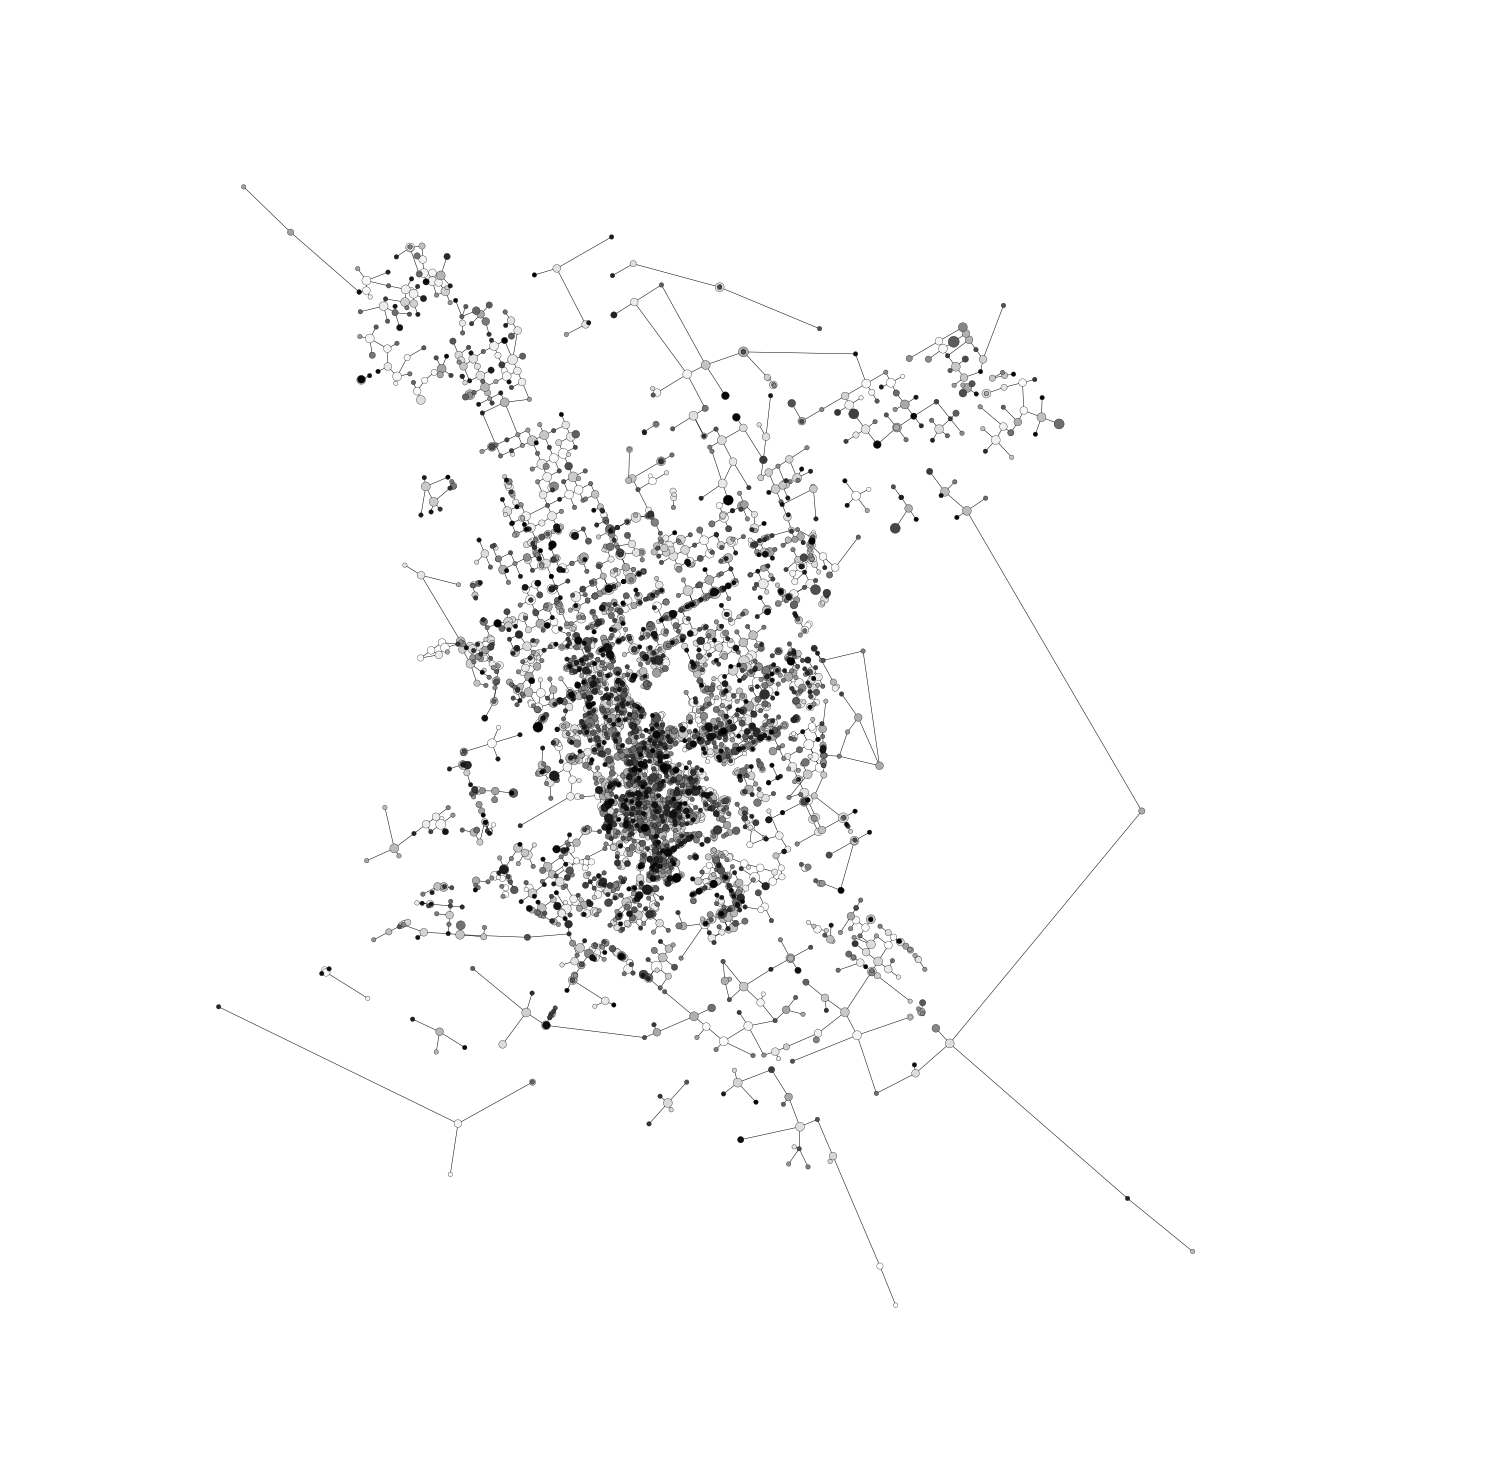

In [6]:
plt.figure(figsize=(20,20))

node_sizes = [v * 20 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
print(node_colors)
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=.5, node_color=node_colors);

Lets plot some additional **edge** properties. 

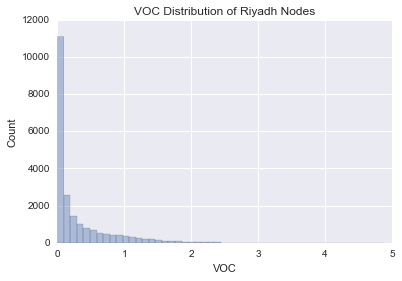

In [20]:
sns.set_style("darkgrid")
sns.distplot(df['voc'], kde=False)

plt.xlabel('VOC')
plt.ylabel('Count')
plt.title('VOC Distribution of Riyadh Nodes')

A **boxplot** is a convenient way of graphically depicting groups of numerical data through their quartiles. **Outliers** may be plotted as individual points. `Seaborn` provides a convenient way to construct **boxplots**.

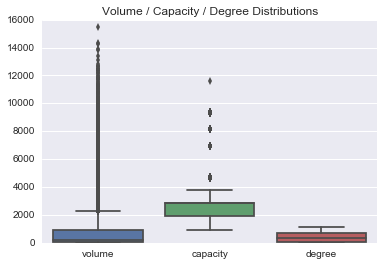

In [21]:
# here we will be using the df we constructed when we imported riyadh_route_edges_am.txt!
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['volume', 'capacity','degree']])
plt.title('Volume / Capacity / Degree Distributions')

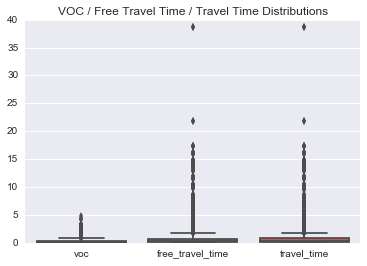

In [22]:
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['voc', 'free_travel_time','travel_time']])
plt.title('VOC / Free Travel Time / Travel Time Distributions')

### In-Class Exercise

As you may have noticed, we have multiple `.txt` files with congestion results for multiple times of the day. Import all the files and for each of them, create a different `Dataframe`. Now, merge the Dataframes into a single one, and create a histogram showing their **VOC** values, and one for the **travel_time**. Each histogram should contain the 3 different datasets that correspond to the 3 different times of the day (am, md, pm). 

The VOC histogram will contain the values for the 3 times of the day, and the travel time histogram will have the same.

In [17]:
# VOC

In [18]:
# Travel_time